In [1]:
%matplotlib notebook
import os
import time
import numpy as np
import csv
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from load_from_coords_1 import align_if_not_aligned_yet
from classes.Settings import Settings
from calc_avg_fragment_2 import read_results_alignment, make_avg_fragment_if_not_exists

from helpers.geometry_helpers import make_coordinate_df
from helpers.density_helpers import prepare_df

central_groups = ["RCOMe", "RNO2", "H2O", "ArCI", "NO3", "RC6F5", "RC6H5"] #,
contact_groups = ["CF", "RCN", "R2CO", "XH", "CCH3", "C2CH2", "RC6H5", "ArCH"] #  
to_count =       ["F",   "N",    "O",   "H",   "H",     "H", "centroid", "H"]
resolutions = np.arange(0.1, 1.1, 0.1)

# Count the structures

In [14]:
count = True
counts = []

if count:
    for central_group in central_groups:

        for to_count_contact, contact_group in zip(to_count, contact_groups):
            datafile = ".\\data\\" + central_group + "\\" + central_group + "_" + contact_group + "_vdw.5.cor"

            ids = []

            with open(datafile, 'r') as resultsFile:
                line = "hoi"
                while line:
                    line = resultsFile.readline()
                    if "**" in line:
                        ids.append(line.split("**")[0])

                print(central_group, contact_group, len(ids), len(set(ids)))
                counts.append(len(ids))

RCOMe CF 7355 1460
RCOMe RCN 1874 796
RCOMe R2CO 63130 19595
RCOMe XH 41430 11695
RCOMe CCH3 36736 10128
RCOMe C2CH2 21099 6757
RCOMe RC6H5 34070 6904
RCOMe ArCH 54941 11152
RNO2 CF 3785 1292
RNO2 RCN 2499 1266
RNO2 R2CO 22072 10959
RNO2 XH 131420 19832
RNO2 CCH3 30316 8903
RNO2 C2CH2 22066 6532
RNO2 RC6H5 28795 7501
RNO2 ArCH 51760 14800
H2O CF 3775 1208
H2O RCN 6886 2335
H2O R2CO 106727 30635
H2O XH 559303 56792
H2O CCH3 20864 8006
H2O C2CH2 19979 8122
H2O RC6H5 16231 5184
H2O ArCH 23145 9803
ArCI CF 9717 1126
ArCI RCN 707 205
ArCI R2CO 3701 1367
ArCI XH 4127 1144
ArCI CCH3 3671 810
ArCI C2CH2 2333 500
ArCI RC6H5 3424 610
ArCI ArCH 8803 1644
NO3 CF 233 82
NO3 RCN 396 221
NO3 R2CO 3044 1297
NO3 XH 64615 7484
NO3 CCH3 4584 1218
NO3 C2CH2 4369 1087
NO3 RC6H5 5390 1063
NO3 ArCH 7459 2197
RC6F5 CF 211950 10011
RC6F5 RCN 815 177
RC6F5 R2CO 2276 865
RC6F5 XH 3683 1183
RC6F5 CCH3 45296 4003
RC6F5 C2CH2 16364 2070
RC6F5 RC6H5 26500 3355
RC6F5 ArCH 43092 4657
RC6H5 CF 157313 18983
RC6H5 RCN 47

# Data Gathering

In [3]:
run_everything_again = False

if run_everything_again:
    with open('density_comp_time1.csv', 'a', newline='') as resultsfile:
        writer = csv.writer(resultsfile)
        writer.writerow(['central', 'contact', 'to_count', 'alignment', 'avg_fragment', 'coordinate_df'])

        for central_group in central_groups:
            for to_count_contact, contact_group in zip(to_count, contact_groups):
                print(central_group, contact_group, to_count_contact)

                datafile = ".\\data\\" + central_group + "\\" + central_group + "_" + contact_group + "_vdw.5.cor"
                result1 = ".\\results\\" + central_group + "\\" + central_group + "_" + contact_group + "_vdw.5\\"\
                          + central_group + "_" + contact_group + "_vdw.5_aligned.csv"

                settings = Settings(datafile)
                settings.set_atom_to_count(to_count_contact)

                starttime = time.time()
                align_if_not_aligned_yet(settings, datafile)
                alignment_time = time.time() - starttime

                aligned_fragments_df = read_results_alignment(settings.get_aligned_csv_filename())
                avg_fragment = make_avg_fragment_if_not_exists(settings, aligned_fragments_df)
                avg_fragment_time = time.time() - starttime - alignment_time

                df = aligned_fragments_df[~aligned_fragments_df.in_central_group]
                coordinate_df = make_coordinate_df(df, settings, avg_fragment)
                coordinate_df_time = time.time() - starttime - avg_fragment_time

                writer.writerow([central_group, contact_group, to_count_contact, alignment_time, avg_fragment_time, coordinate_df_time])

# Analyzing data

In [15]:
df = pd.read_csv('density_comp_time1.csv')
df["count"] = counts[:-2]
display(df)

,central,contact,to_count,alignment,avg_fragment,coordinate_df,count
0,RCOMe,CF,F,12.276596,0.230171,15.815842,7355
1,RCOMe,RCN,N,3.280379,0.088763,4.062423,1874
2,RCOMe,R2CO,O,117.722053,1.019825,143.631957,63130
3,RCOMe,XH,H,73.116710,0.718451,90.698598,41430
4,RCOMe,CCH3,H,68.723367,0.676753,106.333025,36736
5,RCOMe,C2CH2,H,39.881639,0.503886,56.027820,21099
6,RCOMe,RC6H5,centroid,77.350637,0.957333,92.216553,34070
7,RCOMe,ArCH,H,116.313607,1.403714,173.276421,54941
8,RNO2,CF,F,4.787379,0.096842,5.957499,3785
9,RNO2,RCN,N,3.097887,0.058134,3.871693,2499


RCOMe


<IPython.core.display.Javascript object>


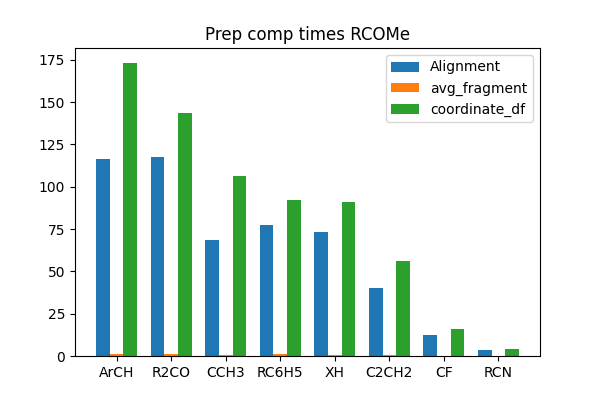

RNO2


<IPython.core.display.Javascript object>


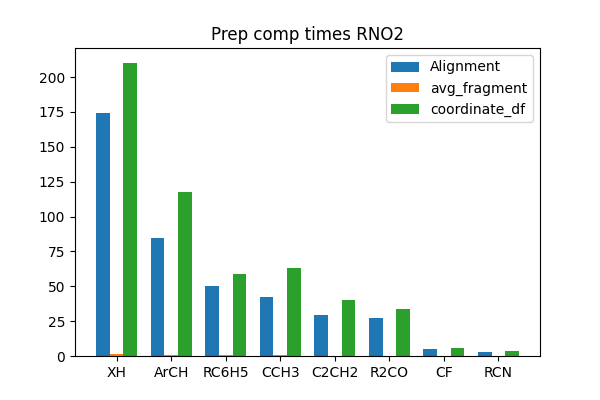

H2O


<IPython.core.display.Javascript object>


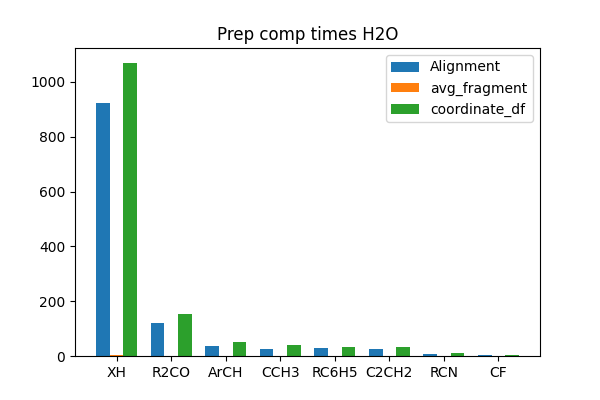

ArCI


<IPython.core.display.Javascript object>


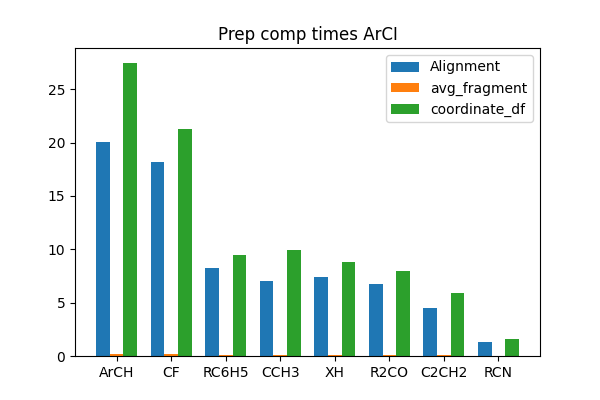

NO3


<IPython.core.display.Javascript object>


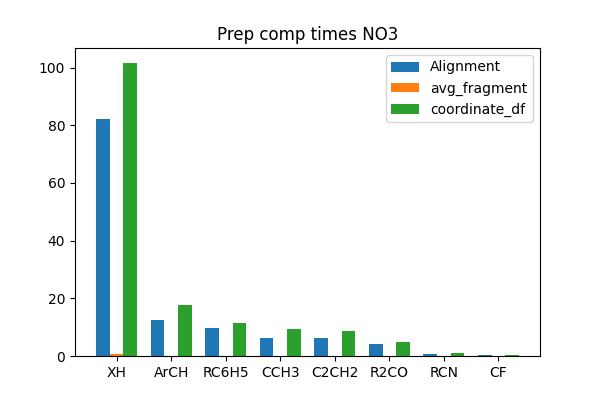

RC6F5


<IPython.core.display.Javascript object>


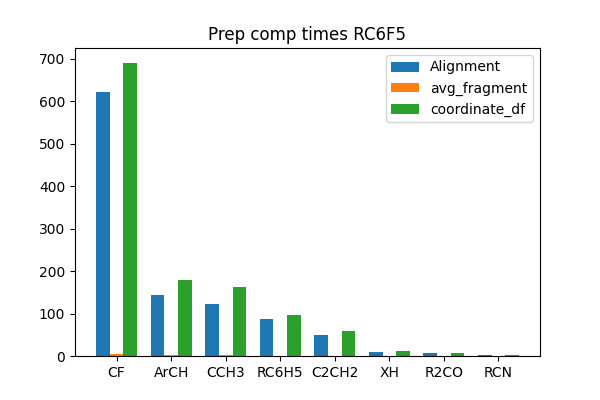

RC6H5


<IPython.core.display.Javascript object>


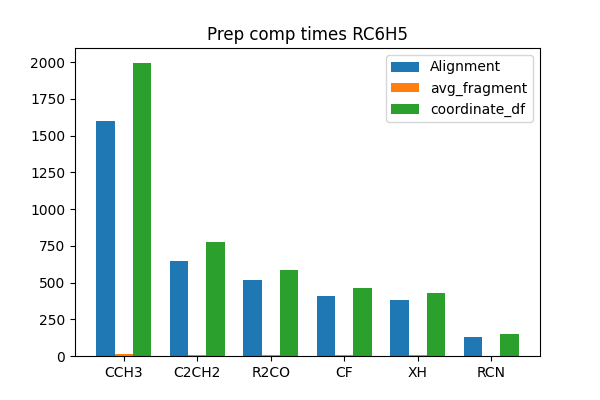

In [20]:
for central_group in central_groups:
    print(central_group)
    bars1 = df[df.central == central_group]['alignment']
    bars2 = df[df.central == central_group]['avg_fragment']
    bars3 = df[df.central == central_group]['coordinate_df']
        
    bar_width = 0.25  # the width of the bars
    r1 = np.arange(len(bars1))
    r2 = [x + bar_width for x in r1]
    r3 = [x + bar_width for x in r2]

    # make that plot
    fig, ax = plt.subplots(figsize=(6,4))
    rects1 = ax.bar(r1, bars1, bar_width, label='Alignment')
    rects2 = ax.bar(r2, bars2, bar_width, label='avg_fragment')
    rects3 = ax.bar(r3, bars3, bar_width, label='coordinate_df')

    ax.set_xticks([r + bar_width for r in range(len(bars1))])
    ax.set_xticklabels(df[df.central == central_group]['contact'])
    
    plt.title('Prep comp times ' + central_group)
    
    plt.legend()
    
    plt.savefig("results/figures/Prep_times_" + central_group + ".svg", format="svg")
    plt.show()

In [17]:
# sort df
df["total"] = df["alignment"] + df["avg_fragment"] + df["coordinate_df"]
df = df.sort_values("total", ascending=False)

<IPython.core.display.Javascript object>


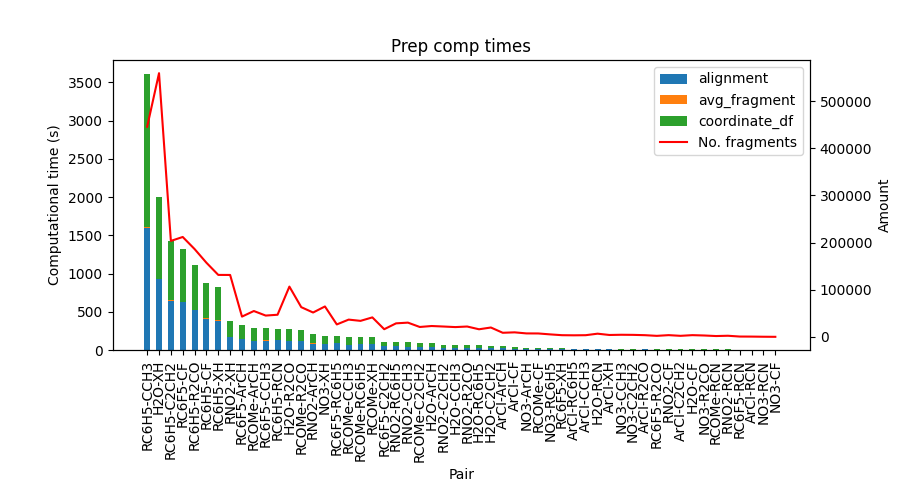

In [39]:
i = 0
r1 = []
xtick_labels = []

fig, ax = plt.subplots(figsize=(9,5))
    
for _, row in df.iterrows():
    bars1 = row['alignment']
    bars2 = row['avg_fragment']
    bars3 = row['coordinate_df']
        
    bar_width = 0.5  # the width of the bars
    r1.append(i)

    # make that plot
    rects1 = plt.bar(i, bars1, bar_width, color="tab:blue")
    rects2 = plt.bar(i, bars2, bar_width, bottom=bars1, color="tab:orange")
    rects3 = plt.bar(i, bars3, bar_width, bottom=bars1+bars2, color="tab:green")

    xtick_labels.append(row["central"] + "-" + row['contact'])
    i+=1


    
plt.xticks(r1, xtick_labels, rotation=90)

plt.title('Prep comp times')
plt.subplots_adjust(bottom=0.3)

ax.set_xlabel("Pair")
ax.set_ylabel("Computational time (s)")

ax2 = ax.twinx()
ax2.set_ylabel("Amount")

line = ax2.plot(range(len(df)), df["count"], color="red", label="no unique fragments")

plt.legend((rects1[0], rects2[0], rects3[0], line[0]), ('alignment', 'avg_fragment', 'coordinate_df', 'No. fragments'))

plt.savefig("results/figures/Prep_times_total.svg", format="svg")

plt.show()

# some code to check if labels are the same in the fragments of all the pairs

In [8]:
central_group = "ArCI"
    
def plot_fragment_with_labels(central_group, contact_group):
    datafile = ".\\data\\" + central_group + "\\" + central_group + "_" + contact_group + "_vdw.5.cor"
    csvfile =  ".\\data\\" + central_group + "\\" + central_group + "_" + contact_group + "_vdw.5.csv"

    fp = open(csvfile)
    labels = fp.readline().strip().split(',')
    atoms = fp.readline().strip().split(',')
    fp.close()

    to_delete = []
    for i in range(len(labels)):
        if not "LAB" in labels[i]:
            to_delete.append(i)

    for i in reversed(to_delete):
        del labels[i]
        del atoms[i]

    fp = open(datafile)
    line = fp.readline()
    line = fp.readline()

    firstfragment = True
    dictionary = {}

    while firstfragment:                 
        information = line.split()
        x, y, z = float(information[1]), float(information[2]), float(information[3])
        dictionary[information[0].strip("%")] = [x,y,z]

        line = fp.readline()
        if "**FRAG**" in line:
            firstfragment = False

    fp.close()

    print(atoms)
    print(dictionary)

    fig = plt.figure()
    ax: Axes3D = fig.add_subplot(111, projection='3d')

    for i, atom in enumerate(atoms):
        x,y,z = dictionary[atom][0], dictionary[atom][1], dictionary[atom][2]

        if 'R' in atom:
            color = 'green'
            label = 'R'
        elif 'H' in atom:
            color = 'grey'
            label = 'H'
        elif 'O' in atom:
            color='red'
            label = 'O'
        elif 'F' in atom:
            color='orchid'
            label = 'F'
        elif 'N' in atom:
            color='blue'
            label = 'N'
        else:
            color = 'black'
            label ='C'

        ax.scatter(x,y,z, color=color)

        ax.text(x+0.01, y+0.01, z+0.01, labels[i])

    ax.set_xlabel('X axis')
    ax.set_ylabel('Y axis')
    ax.set_zlabel('Z axis')

    plt.title(central_group + "-" + contact_group)
    plt.show()